--- 5G NETWORK TRAFFIC ANALYSIS ---
>> Generating synthetic RAN logs...
>> Dataset Shape: (4320, 2)


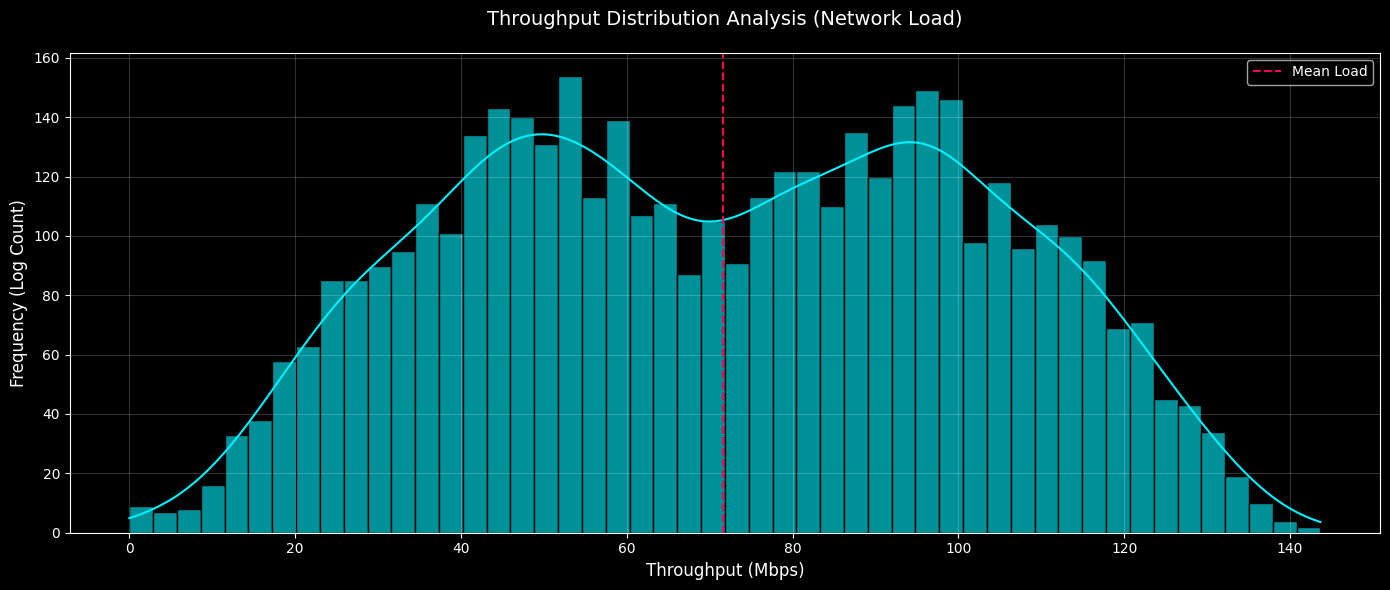

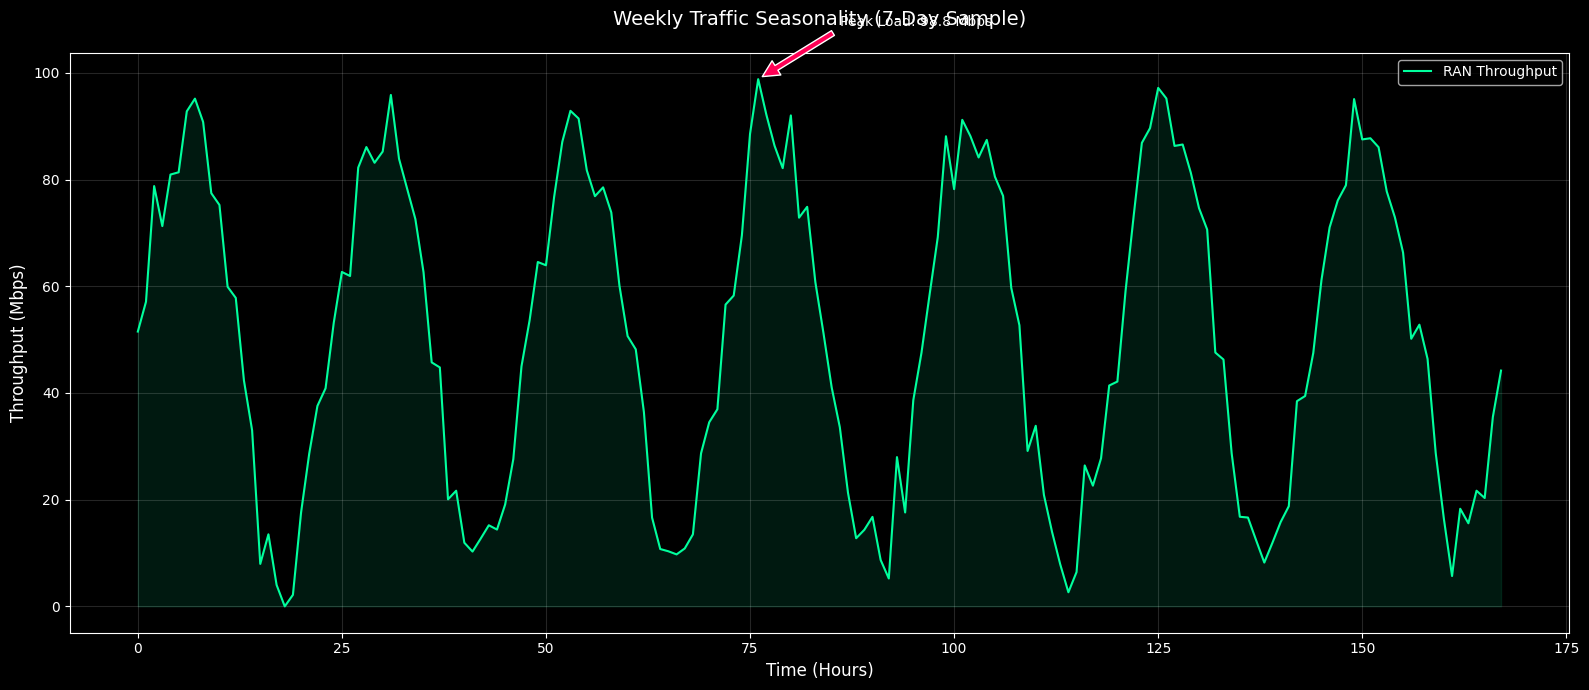

RESEARCH CONCLUSIONS:
1. Mean Network Load: 71.64 Mbps
2. Peak Capacity Usage: 143.68 Mbps
3. Pattern: Clear diurnal seasonality observed (Day/Night cycles).
4. Strategy: LSTM model is suitable due to strong temporal autocorrelation.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# --- CONFIGURATION ---
# Set "Cyberpunk/Scientific" style
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.2
plt.rcParams['lines.linewidth'] = 1.5

# Path setup
sys.path.append(os.path.abspath('..'))
from src.data_loader import DataLoader
from src.config import DAYS

print("--- 5G NETWORK TRAFFIC ANALYSIS ---")

# 1. DATA INGESTION
print(">> Generating synthetic RAN logs...")
loader = DataLoader()
df = loader.generate_ran_traffic(days=DAYS)
print(f">> Dataset Shape: {df.shape}")

# 2. STATISTICAL ANALYSIS (Visual 1: Distribution)
plt.figure(figsize=(14, 6))
# Histogram with Kernel Density Estimate (KDE)
sns.histplot(df['throughput_mbps'], bins=50, kde=True, 
             color='#00f2ff', edgecolor='black', alpha=0.6)

plt.title('Throughput Distribution Analysis (Network Load)', fontsize=14, pad=20)
plt.xlabel('Throughput (Mbps)', fontsize=12)
plt.ylabel('Frequency (Log Count)', fontsize=12)
plt.axvline(df['throughput_mbps'].mean(), color='#ff0055', linestyle='--', label='Mean Load')
plt.legend()
plt.tight_layout()
plt.show()

# 3. TEMPORAL PATTERN RECOGNITION (Visual 2: Time Series)
# Zooming into first 7 days (168 hours) to show seasonality
subset = df.iloc[:168]

plt.figure(figsize=(16, 7))
plt.plot(subset['timestamp'], subset['throughput_mbps'], 
         color='#00ff9d', label='RAN Throughput')

# Highlight "Day/Night" cycles
plt.fill_between(subset['timestamp'], subset['throughput_mbps'], alpha=0.1, color='#00ff9d')

plt.title('Weekly Traffic Seasonality (7-Day Sample)', fontsize=14, pad=20)
plt.xlabel('Time (Hours)', fontsize=12)
plt.ylabel('Throughput (Mbps)', fontsize=12)

# Annotate an anomaly (Peak)
peak_idx = subset['throughput_mbps'].idxmax()
peak_val = subset['throughput_mbps'].max()
plt.annotate(f'Peak Load: {peak_val:.1f} Mbps', 
             xy=(peak_idx, peak_val), 
             xytext=(peak_idx+10, peak_val+10),
             arrowprops=dict(facecolor='#ff0055', shrink=0.05),
             color='white')

plt.legend(loc='upper right')
plt.grid(True, alpha=0.15)
plt.tight_layout()
plt.show()

print("RESEARCH CONCLUSIONS:")
print(f"1. Mean Network Load: {df['throughput_mbps'].mean():.2f} Mbps")
print(f"2. Peak Capacity Usage: {df['throughput_mbps'].max():.2f} Mbps")
print("3. Pattern: Clear diurnal seasonality observed (Day/Night cycles).")
print("4. Strategy: LSTM model is suitable due to strong temporal autocorrelation.")